In [1]:
## This block imports all the Python libraries we need for the script

import math
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


## This is the stock ticker for NVIDIA. You could change this to any stock you want, or even the timeline
data = yf.download("NVDA", start="2023-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [2]:
data.head()


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2023-01-03,14.302287,14.982683,14.083482,14.837811,401277000
2023-01-04,14.735901,14.839809,14.228353,14.554063,431324000
2023-01-05,14.252331,14.551065,14.135434,14.478130,389168000
2023-01-06,14.845803,14.996669,14.021536,14.461145,405044000
2023-01-09,15.614120,16.041740,15.127553,15.270426,504231000


In [3]:
## A moving average smooths out price data over time. It helps identify trends

## Calculating the average of the last 20 closing prices
data['SMA20'] = data['Close'].rolling(window=20).mean()
## Calculating the average of the last 50 closing prices
data['SMA50'] = data['Close'].rolling(window=50).mean()


## Volatility measures how much the stock price fluctuates
##.rolling(window=21).std(): Calculates the standard deviation of these daily changes over a 21-day period (roughly one month of trading days).
## * math.sqrt(252): This annualizes the volatility. We multiply by the square root of the number of trading days in a year (approximately 252).
data['vol'] = data['Close'].pct_change().rolling(window=21).std() * math.sqrt(252)


## This shows where the current price stands relative to its recent past
## A high value (e.g., 0.95) means the current price is higher than 95% of the prices in the last 21 days
## .rolling(window=21).rank(pct=True): Ranks the 'Close' price over the last 21 days and converts the rank to a percentile
data['pct_rank'] = data['Close'].rolling(window=21).rank(pct=True)

<Axes: xlabel='Date'>

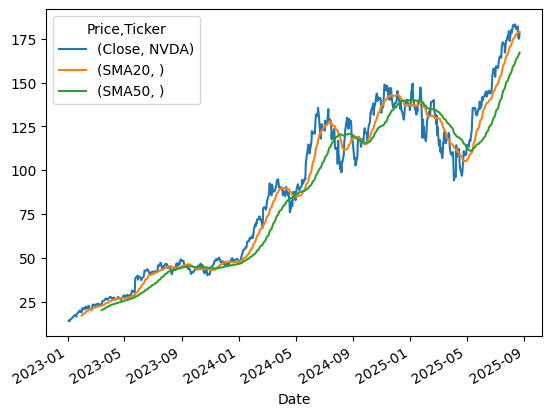

In [4]:

## This plot shows the NVIDIA stock price and its two moving averages on a single graph
to_plot = ["Close", "SMA20", "SMA50"]
data[to_plot].plot()




In [ ]:
## This graph is a great example of a strong, healthy uptrend. 
## The consistent upward movement of the price and both moving averages, combined with the initial golden cross, 
## all point to a stock that has been in a very positive cycle

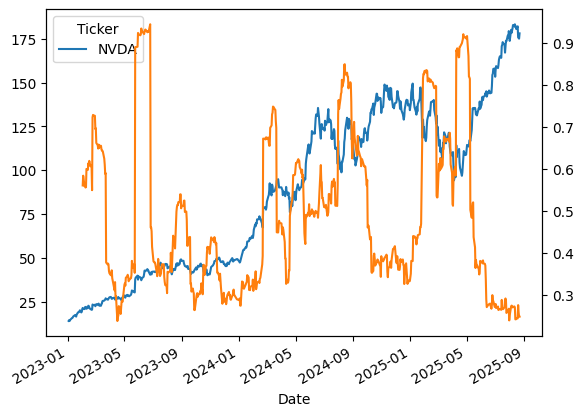

In [6]:
## Plotting Close price and Volatility on two different axes:
## We need a primary y-axis for the price (in dollars) and a secondary y-axis for volatility (as a percentage).
## ax = data["Close"].plot(): Creates the first plot for the 'Close' price and assigns the axis to the variable 'ax'.
## data.vol.plot(secondary_y=True, ax=ax): Plots the 'vol' column on a second y-axis using the same 'ax'.

ax = data["Close"].plot()
data.vol.plot(secondary_y=True, ax=ax)
plt.show()

In [ ]:
## In conclusion, this graph shows that while NVIDIA's price has been on a strong upward trend, 
## it has been punctuated by periods of significant volatility, particularly during corrections or rapid changes in momentum. 
## The most recent part of the chart shows the price reaching new highs with a very low level of volatility

<Axes: xlabel='Date'>

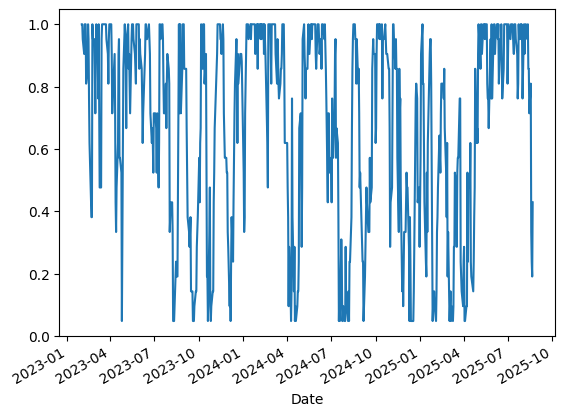

In [8]:
## This creates a simple line graph for the percentile rank over time
data['pct_rank'].plot()

In [ ]:
## The values on the y-axis range from 0.0 to 1.0 (or 0% to 100%).

## A percentile rank of 1.0 (or 100%) means the current closing price is the highest it has been in the last 21 days.

## A percentile rank of 0.0 (or 0%) means the current closing price is the lowest it has been in the last 21 days.


## the percentile rank graph is a dynamic way to see the short-term strength of the stock's momentum. 
## It highlights periods where the stock is consistently making new highs and also shows the sharp pullbacks that have occurred during its climb.